In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install tensorflow

In [3]:
data = pd.read_csv('spotify_data.csv')

In [4]:


# Get the number of rows and columns in the dataset
print(data.shape)

print(data.head())

# Check for missing values
print(data.isnull().sum())


(1159764, 20)
   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  loudness  mode  \
0          68  2012  acoustic         0.483   0.303    4   -10.058     1   
1          50  2012  acoustic         0.572   0.454    3   -10.286     1   
2          57  2012  acoustic         0.409   0.234    3   -13.711     1   
3          58  2012  acoustic         0.392   0.251   10    -9.845     1   
4          54  2012  acoustic         0.430   0.791    6    -5.419     0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0     

In [5]:

print(data.columns)


Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


In [6]:
columns_to_drop = ['ISRC', 'Added By', 'Added At', 'Artist Genres', 'Track URI', 'Track Name', 'Artist URI(s)', 'Artist Name(s)',
       'Album URI', 'Album Name', 'Album Artist URI(s)',
       'Album Artist Name(s)', 'Album Release Date', 'Album Image URL',
       'Disc Number', 'Track Number','Label', 'Copyrights', 'Track Preview URL', 'Album Genres']
columns_to_drop2 = ['Unnamed: 0', 'artist_name', 'track_name','track_id','genre', 'year']
data2 = data.drop(columns=columns_to_drop2)

In [7]:
numerical_summary = data2.describe()
print(numerical_summary)

         popularity  danceability        energy           key      loudness  \
count  1.159764e+06  1.159764e+06  1.159764e+06  1.159764e+06  1.159764e+06   
mean   1.838312e+01  5.374382e-01  6.396699e-01  5.287778e+00 -8.981353e+00   
std    1.588554e+01  1.844780e-01  2.705009e-01  3.555197e+00  5.682215e+00   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00 -5.810000e+01   
25%    5.000000e+00  4.130000e-01  4.540000e-01  2.000000e+00 -1.082900e+01   
50%    1.500000e+01  5.500000e-01  6.940000e-01  5.000000e+00 -7.450000e+00   
75%    2.900000e+01  6.770000e-01  8.730000e-01  8.000000e+00 -5.276000e+00   
max    1.000000e+02  9.930000e-01  1.000000e+00  1.100000e+01  6.172000e+00   

               mode   speechiness  acousticness  instrumentalness  \
count  1.159764e+06  1.159764e+06  1.159764e+06      1.159764e+06   
mean   6.346533e-01  9.281477e-02  3.215370e-01      2.523489e-01   
std    4.815275e-01  1.268409e-01  3.549872e-01      3.650731e-01   
min    0.000

In [8]:
missing_values = data2.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print(columns_with_missing_values)

Series([], dtype: int64)


In [9]:
data2.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,68,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,50,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,57,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,58,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,54,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


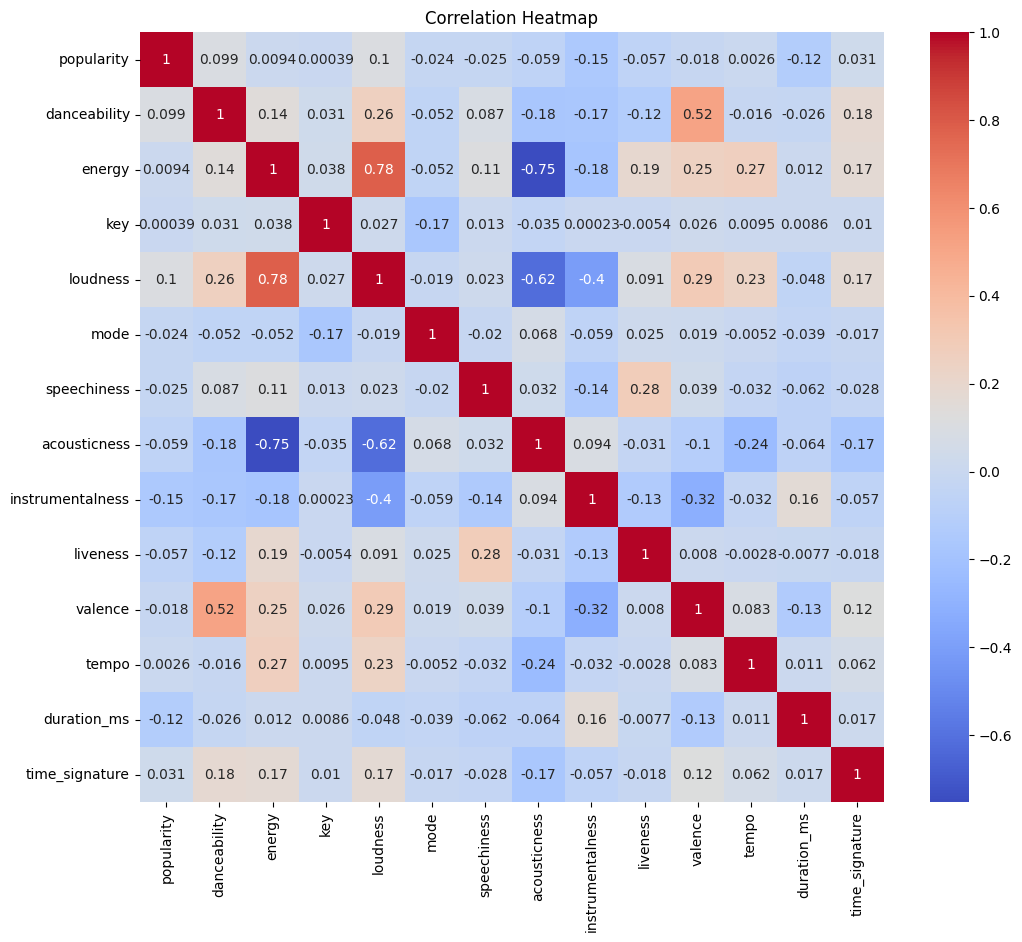

In [10]:
plt.figure(figsize=(12, 10))
correlation_matrix = data2.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.show()


In [11]:
print(data2.columns)

Index(['popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')


In [39]:
numerical_features2=['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
numerical_features= ['Track Duration (ms)', 'Explicit', 'Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo', 'Time Signature']
from sklearn.feature_selection import mutual_info_classif
X = data[numerical_features2]

y = data['popularity']
X.fillna(X.mean(), inplace=True)
mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)


<ipython-input-39-8263f86053f8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


             Feature  Mutual Information
11       duration_ms            0.040805
10             tempo            0.021862
7   instrumentalness            0.018756
6       acousticness            0.018123
3           loudness            0.016079
0       danceability            0.014801
5        speechiness            0.011635
12    time_signature            0.010667
1             energy            0.009413
9            valence            0.008319
4               mode            0.008278
8           liveness            0.007105
2                key            0.002905


In [12]:
import pandas as pd
from sklearn.feature_selection import f_regression

numerical_features2 = ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']

# Assuming 'popularity' is your target variable for regression
y = data['popularity']
X = data[numerical_features2]

# Fill missing values with the mean
X.fillna(X.mean(), inplace=True)

# Calculate F-statistics for feature selection
f_scores, _ = f_regression(X, y)

# Create a DataFrame to store feature names and their F-scores
f_scores_df = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores})

# Sort the DataFrame by F-Score in descending order
f_scores_df = f_scores_df.sort_values(by='F-Score', ascending=False)

# Print the DataFrame with feature names and their F-Scores
print(f_scores_df)


<ipython-input-12-99d2b4f264a5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)


             Feature       F-Score
7   instrumentalness  27759.797438
11       duration_ms  16513.091298
3           loudness  12704.955055
0       danceability  11370.148776
6       acousticness   4076.151053
8           liveness   3776.152794
12    time_signature   1103.404945
5        speechiness    708.019298
4               mode    659.373509
9            valence    378.824355
1             energy    102.516107
10             tempo      7.637441
2                key      0.176776


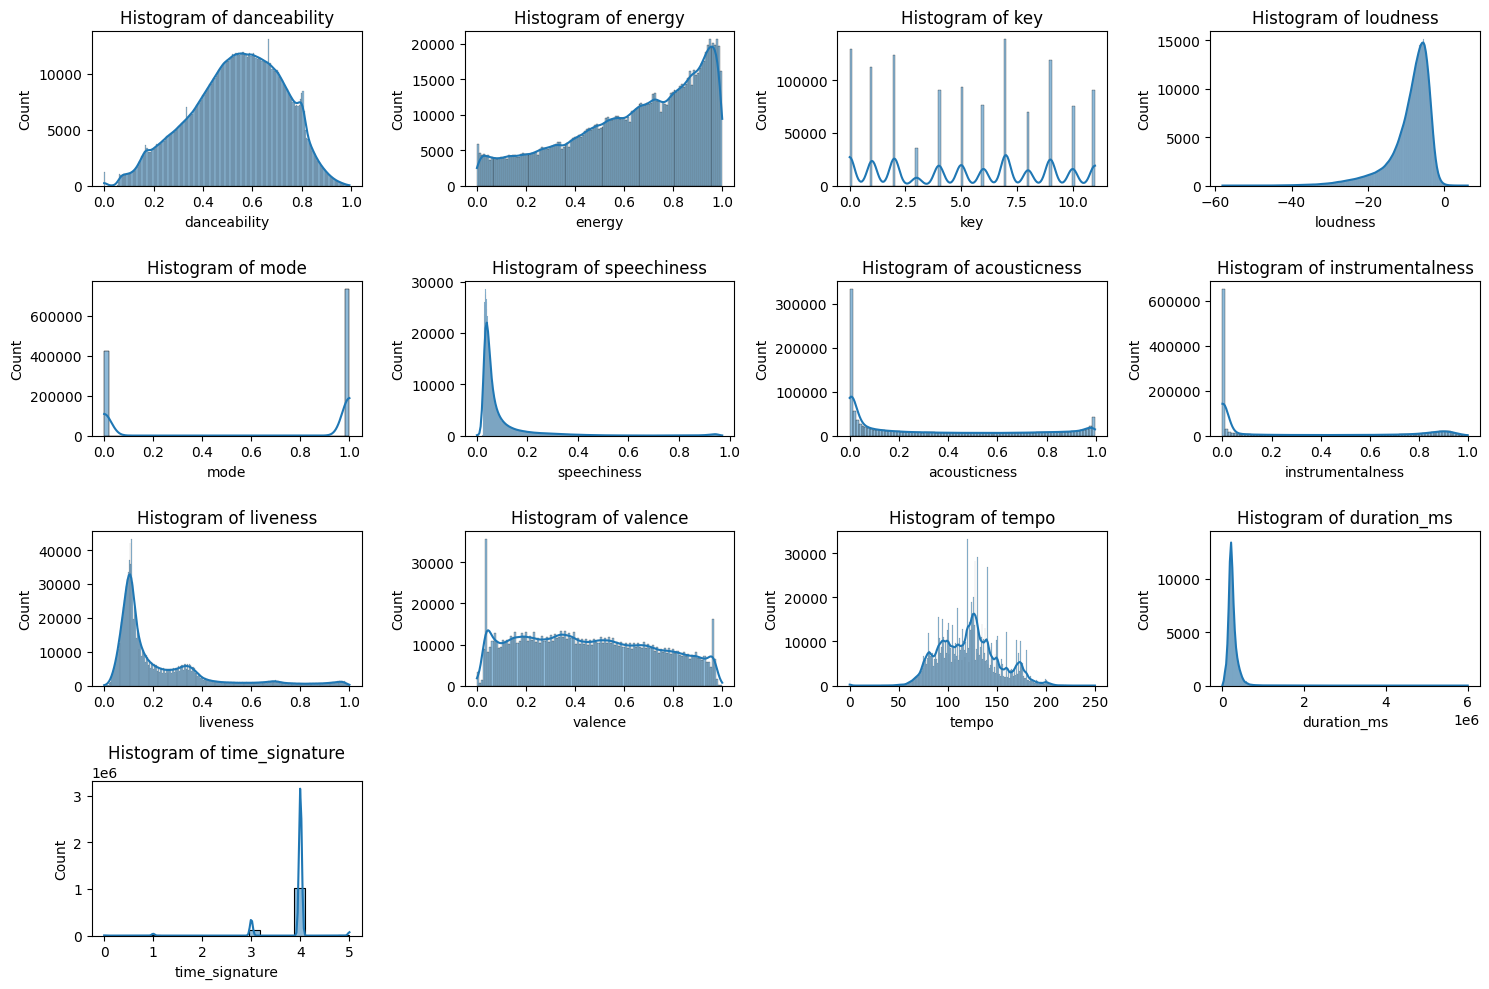

In [37]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features2, 1):
 plt.subplot(4, 4, i)
 sns.histplot(data[feature], kde=True)
 plt.title(f'Histogram of {feature}')
 plt.tight_layout()

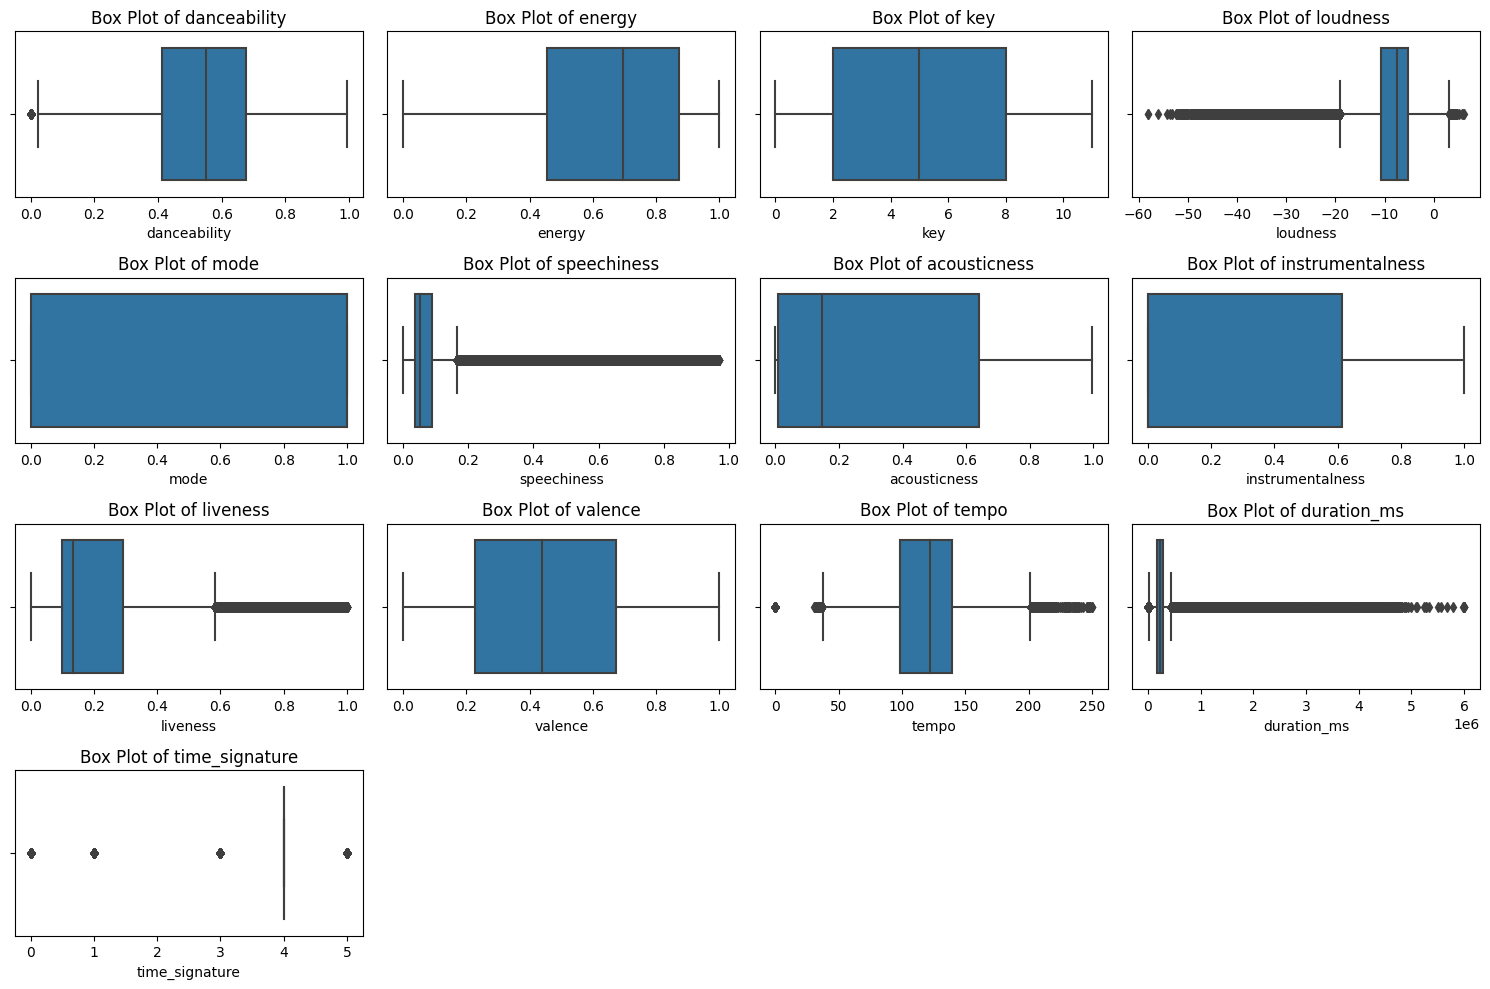

In [38]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features2, 1):
 plt.subplot(4, 4, i)
 sns.boxplot(x=data[feature])
 plt.title(f'Box Plot of {feature}')
 plt.tight_layout()
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(811834, 13)
(811834,)
(347930, 13)
(347930,)


In [15]:
print(X_train.describe())
print(y_train.describe())
print(X_test.describe())
print(y_test.describe())

        danceability         energy            key       loudness  \
count  811834.000000  811834.000000  811834.000000  811834.000000   
mean        0.537388       0.639727       5.291795      -8.978915   
std         0.184471       0.270536       3.556359       5.682463   
min         0.000000       0.000000       0.000000     -58.100000   
25%         0.413000       0.454000       2.000000     -10.828000   
50%         0.550000       0.694000       5.000000      -7.450000   
75%         0.677000       0.873000       8.000000      -5.275000   
max         0.993000       1.000000      11.000000       6.172000   

                mode    speechiness   acousticness  instrumentalness  \
count  811834.000000  811834.000000  811834.000000     811834.000000   
mean        0.634342       0.092824       0.321572          0.252148   
std         0.481615       0.126853       0.355034          0.364959   
min         0.000000       0.000000       0.000000          0.000000   
25%         0.0000

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, median_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
linear_reg_model = LinearRegression()

# Train the model on the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the testing data
linear_reg_predictions = linear_reg_model.predict(X_test)

# Evaluate the model
linear_reg_rmse = mean_squared_error(y_test, linear_reg_predictions, squared=False)
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
linear_reg_rmse2 = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))

linear_reg_mae = mean_absolute_error(y_test, linear_reg_predictions)
linear_reg_evs = explained_variance_score(y_test, linear_reg_predictions)
linear_reg_medae = median_absolute_error(y_test, linear_reg_predictions)
# Calculate adjusted R-squared for Linear Regression
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors
adj_r2_linear_reg = 1 - ((1 - linear_reg_r2) * (n - 1) / (n - p - 1))

# Display Linear Regression evaluation metrics
print("Linear Regression Evaluation Metrics:")
print(f"RMSE: {linear_reg_rmse:.2f}")
print(f"R-squared: {linear_reg_r2:.2f}")
print(f"Adjusted R-squared: {adj_r2_linear_reg:.2f}")
print(f"MAE: {linear_reg_mae:.2f}")
print(f"Explained Variance Score: {linear_reg_evs:.2f}")
print(f"Median Absolute Error: {linear_reg_medae:.2f}")



Linear Regression Evaluation Metrics:
RMSE: 15.33
R-squared: 0.07
Adjusted R-squared: 0.07
MAE: 12.59
Explained Variance Score: 0.07
Median Absolute Error: 11.63


In [18]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the testing data
decision_tree_predictions = decision_tree_model.predict(X_test)

# Evaluate the model
decision_tree_rmse = np.sqrt(mean_squared_error(y_test, decision_tree_predictions))
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)
decision_tree_mae = mean_absolute_error(y_test, decision_tree_predictions)
decision_tree_evs = explained_variance_score(y_test, decision_tree_predictions)
decision_tree_medae = median_absolute_error(y_test, decision_tree_predictions)
# Calculate adjusted R-squared for Decision Tree Regression
adj_r2_decision_tree = 1 - ((1 - decision_tree_r2) * (n - 1) / (n - p - 1))

# Display Decision Tree Regression evaluation metrics
print("\nDecision Tree Regression Evaluation Metrics:")
print(f"RMSE: {decision_tree_rmse:.2f}")
print(f"R-squared: {decision_tree_r2:.2f}")
print(f"Adjusted R-squared: {adj_r2_decision_tree:.2f}")
print(f"MAE: {decision_tree_mae:.2f}")
print(f"Explained Variance Score: {decision_tree_evs:.2f}")
print(f"Median Absolute Error: {decision_tree_medae:.2f}")



Decision Tree Regression Evaluation Metrics:
RMSE: 20.16
R-squared: -0.61
Adjusted R-squared: -0.61
MAE: 15.41
Explained Variance Score: -0.61
Median Absolute Error: 12.00


In [27]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)

# Train the model on the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the testing data
random_forest_predictions = random_forest_model.predict(X_test)

# Evaluate the model
random_forest_rmse = np.sqrt(mean_squared_error(y_test, random_forest_predictions))
random_forest_r2 = r2_score(y_test, random_forest_predictions)
random_forest_mae = mean_absolute_error(y_test, random_forest_predictions)
random_forest_evs = explained_variance_score(y_test, random_forest_predictions)
random_forest_medae = median_absolute_error(y_test, random_forest_predictions)

# Calculate adjusted R-squared for Random Forest Regression
adj_r2_random_forest = 1 - ((1 - random_forest_r2) * (n - 1) / (n - p - 1))

# Display Random Forest Regression evaluation metrics
print("\nRandom Forest Regression Evaluation Metrics:")
print(f"RMSE: {random_forest_rmse:.2f}")
print(f"R-squared: {random_forest_r2:.2f}")
print(f"Adjusted R-squared: {adj_r2_random_forest:.2f}")
print(f"MAE: {random_forest_mae:.2f}")
print(f"Explained Variance Score: {random_forest_evs:.2f}")
print(f"Median Absolute Error: {random_forest_medae:.2f}")


Random Forest Regression Evaluation Metrics:
RMSE: 14.13
R-squared: 0.21
Adjusted R-squared: 0.21
MAE: 11.34
Explained Variance Score: 0.21
Median Absolute Error: 9.83


In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Initialize and train the Lasso Regression model
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha parameter for regularization
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
lasso_predictions = lasso_model.predict(X_test)

# Calculate evaluation metrics for Lasso Regression
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)
lasso_mae = mean_absolute_error(y_test, lasso_predictions)
lasso_evs = explained_variance_score(y_test, lasso_predictions)
lasso_medae = median_absolute_error(y_test, lasso_predictions)

# Calculate adjusted R-squared for Lasso Regression
adj_r2_lasso = 1 - ((1 - lasso_r2) * (n - 1) / (n - p - 1))

# Display Lasso Regression evaluation metrics
print("\nLasso Regression Evaluation Metrics:")
print(f"RMSE: {lasso_rmse:.2f}")
print(f"R-squared: {lasso_r2:.2f}")
print(f"Adjusted R-squared: {adj_r2_lasso:.2f}")
print(f"MAE: {lasso_mae:.2f}")
print(f"Explained Variance Score: {lasso_evs:.2f}")
print(f"Median Absolute Error: {lasso_medae:.2f}")


Lasso Regression Evaluation Metrics:
RMSE: 15.69
R-squared: 0.02
Adjusted R-squared: 0.02
MAE: 12.92
Explained Variance Score: 0.02
Median Absolute Error: 12.16


In [21]:
from sklearn.linear_model import Ridge

# Initialize and train the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test)

# Calculate evaluation metrics for Ridge Regression
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)
ridge_mae = mean_absolute_error(y_test, ridge_predictions)
ridge_evs = explained_variance_score(y_test, ridge_predictions)
ridge_medae = median_absolute_error(y_test, ridge_predictions)

# Calculate adjusted R-squared for Ridge Regression
adj_r2_ridge = 1 - ((1 - ridge_r2) * (n - 1) / (n - p - 1))

# Display Ridge Regression evaluation metrics
print("\nRidge Regression Evaluation Metrics:")
print(f"RMSE: {ridge_rmse:.2f}")
print(f"R-squared: {ridge_r2:.2f}")
print(f"Adjusted R-squared: {adj_r2_ridge:.2f}")
print(f"MAE: {ridge_mae:.2f}")
print(f"Explained Variance Score: {ridge_evs:.2f}")
print(f"Median Absolute Error: {ridge_medae:.2f}")



Ridge Regression Evaluation Metrics:
RMSE: 15.33
R-squared: 0.07
Adjusted R-squared: 0.07
MAE: 12.59
Explained Variance Score: 0.07
Median Absolute Error: 11.63


In [22]:
from xgboost import XGBRegressor

# Initialize and train the XGBoost Regression model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Calculate evaluation metrics for XGBoost Regression
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_evs = explained_variance_score(y_test, xgb_predictions)
xgb_medae = median_absolute_error(y_test, xgb_predictions)

# Calculate adjusted R-squared for XGBoost Regression (Note: XGBoost doesn't directly provide R-squared)
adj_r2_xgb = 1 - ((1 - xgb_r2) * (n - 1) / (n - p - 1))

# Display XGBoost Regression evaluation metrics
print("\nXGBoost Regression Evaluation Metrics:")
print(f"RMSE: {xgb_rmse:.2f}")
print(f"R-squared: {xgb_r2:.2f}")
print(f"Adjusted R-squared: {adj_r2_xgb:.2f}")
print(f"MAE: {xgb_mae:.2f}")
print(f"Explained Variance Score: {xgb_evs:.2f}")
print(f"Median Absolute Error: {xgb_medae:.2f}")



XGBoost Regression Evaluation Metrics:
RMSE: 14.09
R-squared: 0.21
Adjusted R-squared: 0.21
MAE: 11.29
Explained Variance Score: 0.21
Median Absolute Error: 9.72


In [23]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize and train the KNN Regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (K)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Calculate evaluation metrics for KNN Regression
knn_rmse = np.sqrt(mean_squared_error(y_test, knn_predictions))
knn_r2 = r2_score(y_test, knn_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)
knn_evs = explained_variance_score(y_test, knn_predictions)
knn_medae = median_absolute_error(y_test, knn_predictions)

# Calculate adjusted R-squared for KNN Regression (Note: KNN doesn't directly provide R-squared)
adj_r2_knn = 1 - ((1 - knn_r2) * (n - 1) / (n - p - 1))

# Display KNN Regression evaluation metrics
print("\nKNN Regression Evaluation Metrics:")
print(f"RMSE: {knn_rmse:.2f}")
print(f"R-squared: {knn_r2:.2f}")
print(f"Adjusted R-squared: {adj_r2_knn:.2f}")
print(f"MAE: {knn_mae:.2f}")
print(f"Explained Variance Score: {knn_evs:.2f}")
print(f"Median Absolute Error: {knn_medae:.2f}")




KNN Regression Evaluation Metrics:
RMSE: 16.77
R-squared: -0.12
Adjusted R-squared: -0.12
MAE: 13.46
Explained Variance Score: -0.12
Median Absolute Error: 11.60


In [31]:
# 5. ElasticNet Regression:
from sklearn.linear_model import ElasticNet

# Initialize and train the ElasticNet Regression model
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio
elastic_net_model.fit(X_train, y_train)

# Make predictions on the test set
elastic_net_predictions = elastic_net_model.predict(X_test)

# Calculate evaluation metrics for ElasticNet Regression
elastic_net_rmse = np.sqrt(mean_squared_error(y_test, elastic_net_predictions))
elastic_net_r2 = r2_score(y_test, elastic_net_predictions)
elastic_net_mae = mean_absolute_error(y_test, elastic_net_predictions)
elastic_net_evs = explained_variance_score(y_test, elastic_net_predictions)
elastic_net_medae = median_absolute_error(y_test, elastic_net_predictions)

# Calculate adjusted R-squared for ElasticNet Regression (if needed)
# n and p are the same as in the previous code
adj_r2_elastic_net = 1 - (1 - elastic_net_r2) * ((n - 1) / (n - p - 1))

# Display ElasticNet Regression evaluation metrics
print("\nElasticNet Regression Evaluation Metrics:")
print(f"RMSE: {elastic_net_rmse:.2f}")
print(f"R-squared: {elastic_net_r2:.2f}")
print(f"Adjusted R-squared for Elastic Net: {adj_r2_elastic_net:.2f}")
print(f"MAE: {elastic_net_mae:.2f}")
print(f"Explained Variance Score: {elastic_net_evs:.2f}")
print(f"Median Absolute Error: {elastic_net_medae:.2f}")



ElasticNet Regression Evaluation Metrics:
RMSE: 15.69
R-squared: 0.02
Adjusted R-squared for Elastic Net: 0.02
MAE: 12.91
Explained Variance Score: 0.02
Median Absolute Error: 12.15


In [30]:
import tensorflow as tf
from tensorflow import keras
# Ensure that your training and testing data are of type float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Define and compile the model (same as before)
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Make predictions on the test set
nn_predictions = model.predict(X_test)

# Calculate evaluation metrics for the neural network (same as before)
nn_rmse = np.sqrt(mean_squared_error(y_test, nn_predictions))
nn_r2 = r2_score(y_test, nn_predictions)
nn_mae = mean_absolute_error(y_test, nn_predictions)
nn_evs = explained_variance_score(y_test, nn_predictions)
nn_medae = median_absolute_error(y_test, nn_predictions)

# Calculate adjusted R-squared for the neural network (if needed)
# n and p are the same as in the previous code
adj_r2_neural_network = 1 - (1 - nn_r2) * ((n - 1) / (n - p - 1))
# Display neural network evaluation metrics (same as before)
print("Neural Network (Deep Learning) Evaluation Metrics:")
print(f"RMSE: {nn_rmse:.2f}")
print(f"R-squared: {nn_r2:.2f}")
print(f"Adjusted R-squared for Neural Network: {adj_r2_neural_network:.2f}")
print(f"MAE: {nn_mae:.2f}")
print(f"Explained Variance Score: {nn_evs:.2f}")
print(f"Median Absolute Error: {nn_medae:.2f}")


10873/10873 [==============================] - 16s 1ms/step
Neural Network (Deep Learning) Evaluation Metrics:
RMSE: 15.88
R-squared: -0.00
Adjusted R-squared for Neural Network: -4.3864293307604996e-05
MAE: 13.08
Explained Variance Score: -0.00
Median Absolute Error: 12.34


In [33]:
import pandas as pd

# Create a dictionary to store evaluation metrics for each model
evaluation_metrics = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge Regression', 'Lasso Regression', 'KNN', 'Gradient Boosting', 'ElasticNet', 'Neural Network'],
    'RMSE': [linear_reg_rmse, decision_tree_rmse, random_forest_rmse, ridge_rmse, lasso_rmse,
             knn_rmse, xgb_rmse, elastic_net_rmse,nn_rmse],
    'R-squared': [linear_reg_r2, decision_tree_r2, random_forest_r2, ridge_r2, lasso_r2,
                    knn_r2, xgb_r2, elastic_net_r2, nn_r2],
    'MAE': [linear_reg_mae, decision_tree_mae, random_forest_mae, ridge_mae, lasso_mae,
              knn_mae, xgb_mae, elastic_net_mae, nn_mae],
    'Explained Variance': [linear_reg_evs, decision_tree_evs, random_forest_evs, ridge_evs, lasso_evs,
                            knn_evs, xgb_evs,  elastic_net_evs, nn_evs],
    'Median Absolute Error': [linear_reg_medae, decision_tree_medae, random_forest_medae, ridge_medae, lasso_medae,
                               knn_medae, xgb_medae, elastic_net_medae, nn_medae],
    'Adjusted R-squared': [adj_r2_linear_reg, adj_r2_decision_tree, adj_r2_random_forest,
                           adj_r2_ridge, adj_r2_lasso, adj_r2_knn, adj_r2_xgb,adj_r2_elastic_net, adj_r2_neural_network]

}

# Create a DataFrame from the dictionary
df = pd.DataFrame(evaluation_metrics)

# Display the DataFrame
print(df)

def highlight_max_min(s):
    is_max = s == s.max()
    is_min = s == s.min()
    max_color = 'background-color: red'
    min_color = 'background-color: yellow'
    return [max_color if v else min_color if u else '' for u, v in zip(is_min, is_max)]

# Apply the styling function to the numeric columns
styled_df = df.style.apply(highlight_max_min, subset=['RMSE', 'R-squared', 'MAE', 'Explained Variance', 'Median Absolute Error', 'Adjusted R-squared'])

# Display the styled DataFrame
styled_df

               Model       RMSE  R-squared        MAE  Explained Variance  \
0  Linear Regression  15.329784   0.068275  12.588756        6.827453e-02   
1      Decision Tree  20.164660  -0.612121  15.406403       -6.113850e-01   
2      Random Forest  14.129547   0.208461  11.343481        2.092756e-01   
3   Ridge Regression  15.329784   0.068275  12.588759        6.827453e-02   
4   Lasso Regression  15.690708   0.023885  12.915801        2.388512e-02   
5                KNN  16.774714  -0.115645  13.464414       -1.155926e-01   
6  Gradient Boosting  14.085638   0.213373  11.287870        2.133730e-01   
7         ElasticNet  15.686657   0.024389  12.912644        2.438909e-02   
8     Neural Network  15.881572  -0.000006  13.077234       -2.220446e-16   

   Median Absolute Error  Adjusted R-squared  
0              11.630620            0.068240  
1              12.000000           -0.612181  
2               9.827167            0.208431  
3              11.630557            0.068

,Model,RMSE,R-squared,MAE,Explained Variance,Median Absolute Error,Adjusted R-squared
0,Linear Regression,15.329784,0.068275,12.588756,0.068275,11.630620,0.068240
1,Decision Tree,20.164660,-0.612121,15.406403,-0.611385,12.000000,-0.612181
2,Random Forest,14.129547,0.208461,11.343481,0.209276,9.827167,0.208431
3,Ridge Regression,15.329784,0.068275,12.588759,0.068275,11.630557,0.068240
4,Lasso Regression,15.690708,0.023885,12.915801,0.023885,12.160082,0.023849
5,KNN,16.774714,-0.115645,13.464414,-0.115593,11.600000,-0.115687
6,Gradient Boosting,14.085638,0.213373,11.287870,0.213373,9.724388,0.213344
7,ElasticNet,15.686657,0.024389,12.912644,0.024389,12.152288,0.024353
8,Neural Network,15.881572,-0.000006,13.077234,-0.000000,12.341194,-0.000044
